In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

#12-15 IMPORTANT FEATURES

In [ ]:
Stock = pd.read_csv('/content/IBM.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-16,71.04,72.07,69.17,70.80,7710400,3.654238,81.314476,66.697524,69.49,65.70,...,71.051,74.9815,79.7930,1374.62,1374.17,1402.03,10238.80,10192.18,10568.43,71.99
2000-10-17,71.32,72.55,69.17,71.99,8882500,3.430448,80.486396,66.764604,70.80,69.49,...,70.550,74.3305,79.5488,1349.97,1374.62,1387.02,10089.71,10238.80,10524.40,60.80
2000-10-18,61.64,63.15,57.50,60.80,29777800,4.207529,81.106557,64.276443,71.99,70.80,...,69.885,73.6055,79.2676,1342.13,1349.97,1364.59,9975.02,10089.71,10413.79,61.44
2000-10-19,62.44,62.76,59.05,61.44,17966900,4.745871,81.384743,62.401257,60.80,71.99,...,69.814,73.4885,79.1532,1388.76,1342.13,1329.78,10142.98,9975.02,10034.58,60.37
2000-10-20,60.61,61.32,60.01,60.37,9369200,5.099733,81.164966,60.766034,61.44,60.80,...,70.103,73.1995,79.0922,1396.93,1388.76,1374.17,10226.59,10142.98,10192.18,59.17


In [ ]:
df_Stock = df_Stock.dropna()

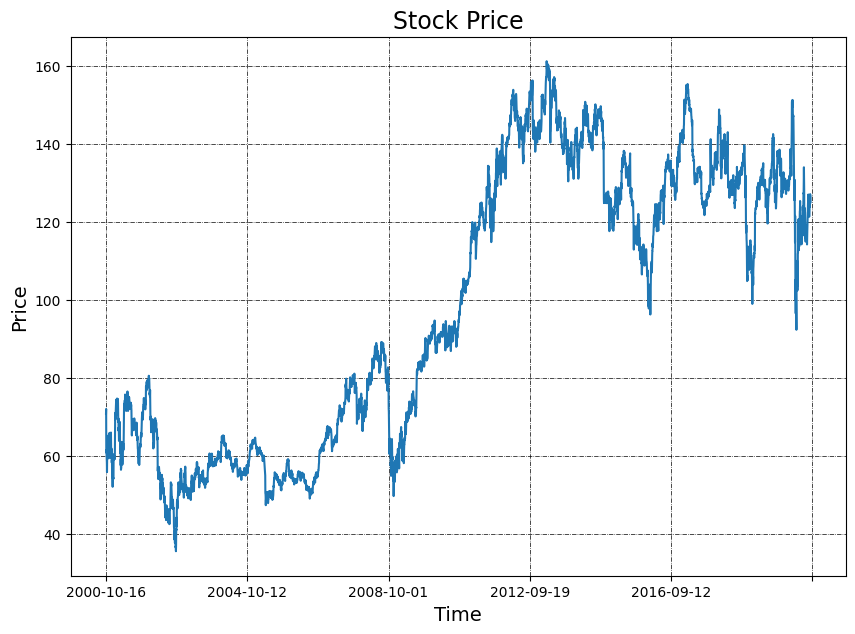

LR Coefficients: 
 [ 8.00180843e-01  7.51470526e-01 -4.79916530e-01 -1.58698109e-05
  1.93293787e-03 -1.60678739e-03 -1.02883285e-01  3.04255183e-02
 -5.84314138e-04 -6.32763713e-04 -3.36140895e-04  8.93170819e-05
 -5.55111512e-17  4.04663865e-04 -6.53296612e-04]
LR Intercept: 
 0.00010231915772453202
LR Coefficients: 
 [ 8.00180843e-01  7.51470526e-01 -4.79916530e-01 -1.58698109e-05
  1.93293787e-03 -1.60678739e-03 -1.02883285e-01  3.04255183e-02
 -5.84314138e-04 -6.32763713e-04 -3.36140895e-04  8.93170819e-05
 -5.55111512e-17  4.04663865e-04 -6.53296612e-04]
LR Intercept: 
 0.00010231915772453202
Performance (R^2):  0.9997796943497783
Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 2.12
Training Mean Squared Error: 0.0
Training RMSE:  0.01
Training MAE:  0.01
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 1.86
Test Mean Squared Error: 0.0
Test RMSE:  0.01
Test MAE:  0.01


<Axes: >

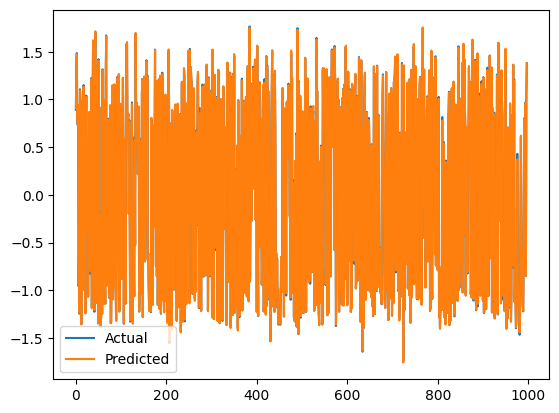

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


df_Stock = df_Stock.drop(columns='Date_col')

#standardisation
scaler = StandardScaler()
df_Stock = pd.DataFrame(scaler.fit_transform(df_Stock), columns=df_Stock.columns)
# print(df_Stock.corr())

df_Stock.columns
X = df_Stock[['High','Low','Open','Volume', 'Upper_Band','Lower_Band','S_Close(t-1)', 'S_Close(t-2)', 'Day' ,'Is_month_end', 'Is_month_start', 'Is_year_end', 'Is_year_start', 'Year', 'Month' ]].values
Y = df_Stock['Close'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)


lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

print("Performance (R^2): ", lr.score(X_test, Y_test))

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')


print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

df_pred = pd.DataFrame(Y_test, columns=['Actual'])
df_pred['Predicted'] = Y_test_pred
df_pred = df_pred.reset_index()

df_pred[['Actual', 'Predicted']].plot()

63 FEATURES

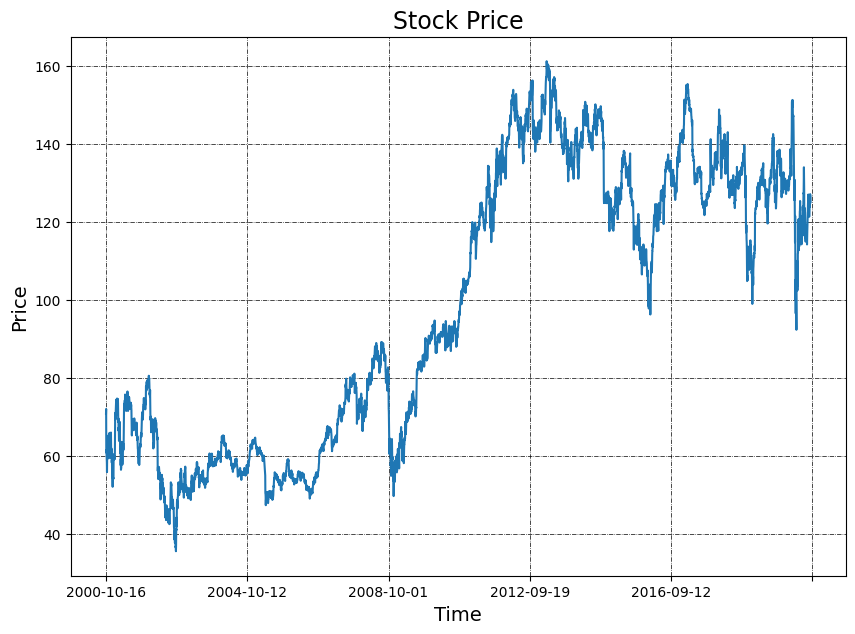

Historical Stock Data length is -  4988
Training Set length -  3990
Validation Set length -  498
Test Set length -  99
(3990, 61) (498, 61) (500, 61)
(3990,) (498,) (500,)
LR Coefficients: 
 [-1.21143451e-01  1.69589037e-01  2.61549889e-01  1.29184628e+00
 -9.33107608e-04 -7.76616769e+03  3.21563089e+04 -5.48866036e+04
  2.59010396e-01  2.07642635e-01  1.39604510e-01  5.08265580e-02
 -3.50834863e-03  1.66419781e-01  3.60716614e-01  2.50557863e+04
  5.83553493e-02  5.79269546e-03  6.72132313e+04 -5.16410284e+04
  1.10505498e+04 -3.81238060e+04  1.14993977e+04 -5.03318222e-02
  4.22628969e-02  1.43181833e-03  3.54343098e-04 -2.55330497e+09
  2.07551009e-03  2.60518265e-03 -3.36847702e+03  3.36847671e+03
  4.49200974e-04 -6.38306141e-04  5.72025776e-04  8.59478489e-03
  9.47713852e-06 -1.01001620e-01 -5.20503521e-03  6.61253929e-04
 -1.92642212e-04  3.79204750e-04  5.97238541e-05 -2.87771225e-04
  3.97372046e+03  4.13894653e-04  5.93549013e-03  1.04814172e-01
  2.42688775e-01 -3.23696613e

<Axes: >

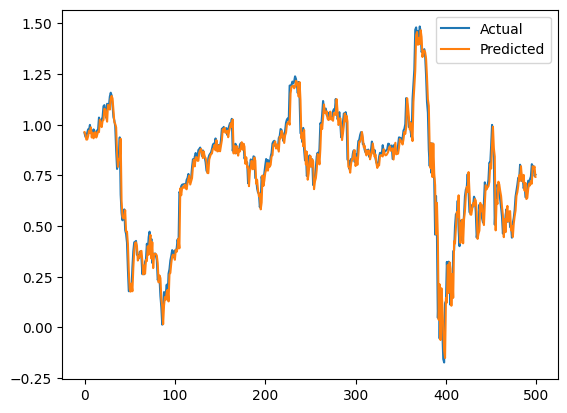

In [ ]:
Stock = pd.read_csv('/content/IBM.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()
df_Stock = df_Stock.dropna()


df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


df_Stock = df_Stock.drop(columns='Date_col')

#standardisation
scaler = StandardScaler()
df_Stock = pd.DataFrame(scaler.fit_transform(df_Stock), columns=df_Stock.columns)


def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.80)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test


X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)


lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

print("Performance (R^2): ", lr.score(X_val, Y_val))
print("Performance (R^2): ", lr.score(X_test, Y_test))

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred['Predicted'] = Y_test_pred
df_pred = df_pred.reset_index()

df_pred[['Actual', 'Predicted']].plot()


# when the features are 62 and the test train split is 10,10 and 80, the accuracy is coming about to be 95 and 93 resp for val and test
# when the train set was 88, the accuracy was less

4 features

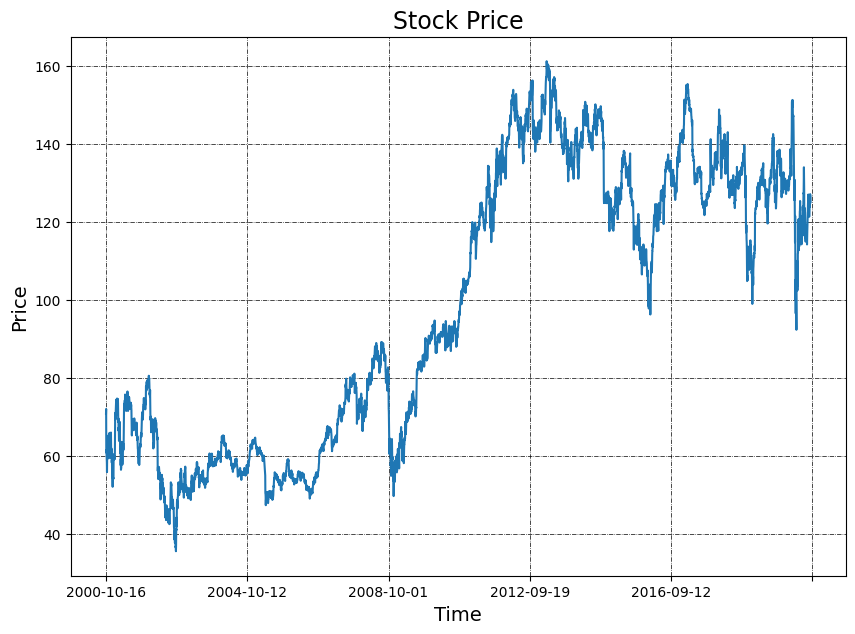

LR Coefficients: 
 [ 8.05111017e-01  7.37775359e-01 -5.43000404e-01 -2.12599013e-04]
LR Intercept: 
 0.00013372928568533885
LR Coefficients: 
 [ 8.05111017e-01  7.37775359e-01 -5.43000404e-01 -2.12599013e-04]
LR Intercept: 
 0.00013372928568533885
Performance (R^2):  0.9997749548900055
Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 2.42
Training Mean Squared Error: 0.0
Training RMSE:  0.01
Training MAE:  0.01
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 1.91
Test Mean Squared Error: 0.0
Test RMSE:  0.01
Test MAE:  0.01


In [ ]:
Stock = pd.read_csv('/content/IBM.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()
df_Stock = df_Stock.dropna()

df_Stock_numeric = df_Stock.select_dtypes(include=[np.number])

df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

date = df_Stock['Date_col']
df_Stock = df_Stock.drop(columns='Date_col')

#standardisation
scaler = StandardScaler()
df_Stock = pd.DataFrame(scaler.fit_transform(df_Stock), columns=df_Stock.columns)
# print(df_Stock.corr())

df_Stock.columns
X = df_Stock[['High','Low','Open','Volume']].values
Y = df_Stock['Close'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)


lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

print("Performance (R^2): ", lr.score(X_test, Y_test))

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))




Next Prediction:  -0.9964575928878949
New Row:  [[-0.46859894 -0.47020122 -0.47103745 -0.23905456]]
Next Prediction:  -0.4682189662955001
New Row:  [[-0.19394857 -0.19593471 -0.19663862 -0.23449628]]
Next Prediction:  -0.19374749933839847
New Row:  [[-0.05338449 -0.05581254 -0.05641788 -0.23668427]]
Next Prediction:  -0.053338585168476615
New Row:  [[ 0.02083186  0.0182339   0.01765206 -0.26040174]]
Next Prediction:  0.020828498434755535
New Row:  [[ 0.07964953  0.07684558  0.07626777 -0.25988724]]
Next Prediction:  0.07959704120842405
New Row:  [[ 0.09693446  0.09457683  0.09418393 -0.25430405]]
Next Prediction:  0.09686533526520144
New Row:  [[ 0.09251063  0.08983378  0.08983563 -0.23081362]]
Next Prediction:  0.09216048918098298
New Row:  [[ 0.07345704  0.07017678  0.0702993  -0.21884514]]
Next Prediction:  0.07292348258044601
New Row:  [[ 0.08853412  0.085007    0.08500209 -0.22722317]]
Next Prediction:  0.08802173695882275
New Row:  [[ 0.08242129  0.07874134  0.07845522 -0.20227

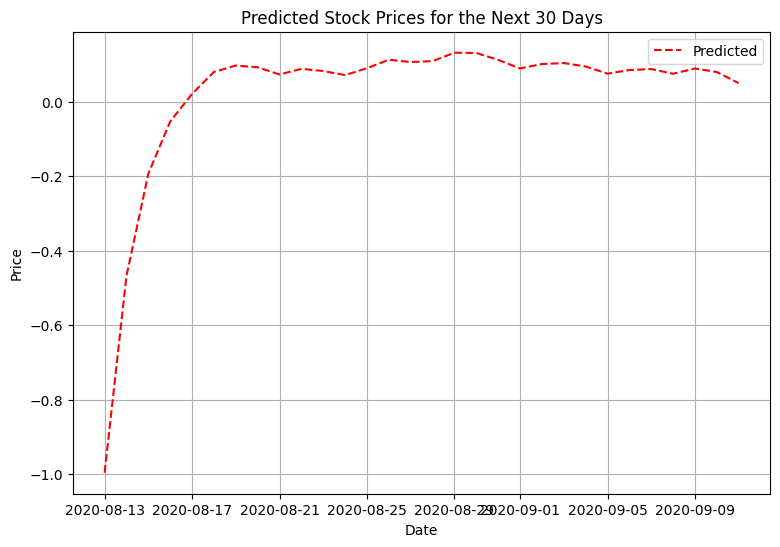

<Axes: >

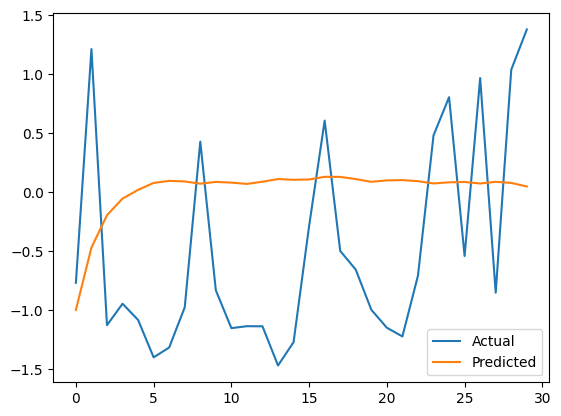

In [ ]:
future_predictions = []

print("\n")
# Remove the last 30 rows from the dataset
x = Y_test[-30:]
X_test = X_test[:-30]

# This should show the last 30 rows, none of which should be part of the original last 30 rows

last_known_features = X_test[-30:].copy()  # Start with the last 30 days of known features
for _ in range(30):
    next_prediction = lr.predict(last_known_features[-1].reshape(1, -1))[0]
    future_predictions.append(next_prediction)
    print("Next Prediction: ", next_prediction)
    # Remove the first row and add the new prediction as the last row
    last_known_features = last_known_features[1:, :]
    # Create a new row with the next prediction value and average other features (for simplicity)
    new_row = np.array([
        (last_known_features[:, 0].mean() + next_prediction) / 2,
        (last_known_features[:, 1].mean() + next_prediction) / 2,
        (last_known_features[:, 2].mean() + next_prediction) / 2,
        last_known_features[:, 3].mean()
    ]).reshape(1, -1)
    print("New Row: ", new_row)  # Debugging statement
    last_known_features = np.append(last_known_features, new_row, axis=0)
print("Performance (R^2): ", lr.score(last_known_features, future_predictions))
print("\n")
print("\n")

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=date[-1], periods=30)
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Close'])
print(future_dates)

# Plot just the predicted prices
plt.figure(figsize=(9, 6))
plt.plot(future_df.index, future_df['Predicted Close'], label='Predicted', linestyle='--', color='r')
plt.title('Predicted Stock Prices for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

df_pred = pd.DataFrame(x, columns=['Actual'])
df_pred['Predicted'] = future_predictions
df_pred = df_pred.reset_index()

df_pred[['Actual', 'Predicted']].plot()

1 feature

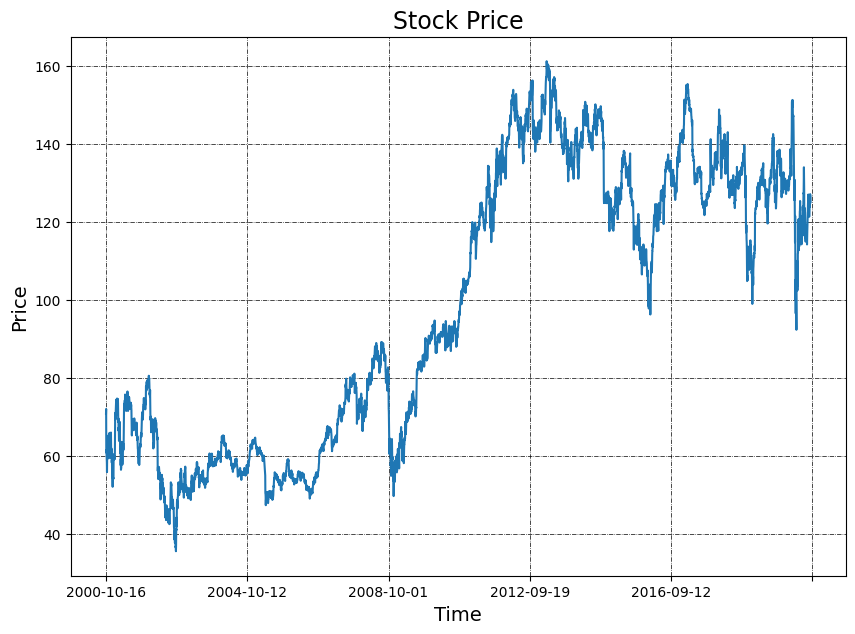

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month',
       'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20',
       'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close',
       'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast', 'close'],
      dtype='object')




In [ ]:
Stock = pd.read_csv('/content/IBM.csv',  index_col=0)
df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()
df_Stock = df_Stock.dropna()

df_Stock_numeric = df_Stock.select_dtypes(include=[np.number])

df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

date = df_Stock['Date_col']
df_Stock = df_Stock.drop(columns='Date_col')

#standardisation
scaler = StandardScaler()
df_Stock = pd.DataFrame(scaler.fit_transform(df_Stock), columns=df_Stock.columns)
# print(df_Stock.corr())
df_Stock['close'] = df_Stock['Close'].shift(-1)
print(df_Stock.columns)
print("\n")

#impute the values
df_Stock['close'] = df_Stock['close'].fillna(df_Stock['close'].mean())

X = df_Stock[['close']].values
Y = df_Stock['Close'].values

In [ ]:
has_nan_A = df_Stock['close'].isna().any()
print(f"Column 'A' has NaN values: {has_nan_A}")

Column 'A' has NaN values: False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)


lr = LinearRegression()
lr.fit(X_train, Y_train)

print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

print("Performance (R^2): ", lr.score(X_test, Y_test))

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

LR Coefficients: 
 [0.99907749]
LR Intercept: 
 -1.9406283045129893e-06
LR Coefficients: 
 [0.99907749]
LR Intercept: 
 -1.9406283045129893e-06
Performance (R^2):  0.9981853818948822
Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 5.99
Training Mean Squared Error: 0.0
Training RMSE:  0.04
Training MAE:  0.03
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 5.1
Test Mean Squared Error: 0.0
Test RMSE:  0.04
Test MAE:  0.03


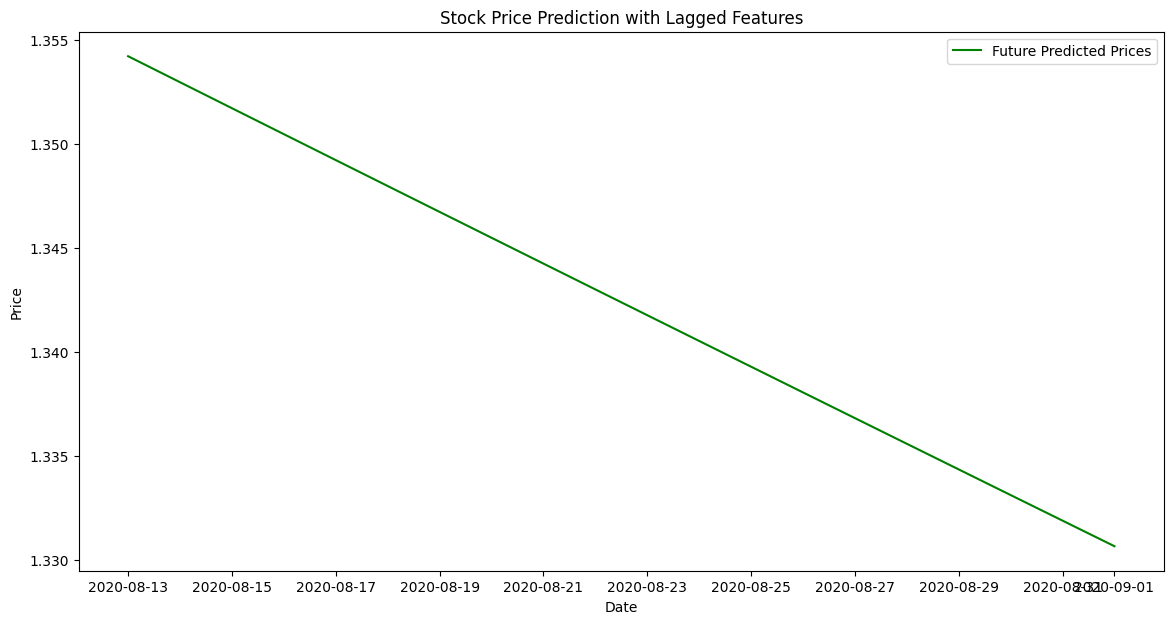

In [ ]:
future_days = 20

last_known_data = Y_test_pred[-1].reshape(1, -1)
future_predictions = []
for i in range(future_days):
    future_pred = lr.predict(last_known_data)[0]
    future_predictions.append(future_pred)

    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = future_pred

last_date = date[-1]
future_dates = pd.date_range(last_date, periods=future_days)
future_df = pd.DataFrame({
    'Predicted_Close': future_predictions
}, index=future_dates)


plt.figure(figsize=(14, 7))
plt.plot(future_df.index[-40:], future_df['Predicted_Close'][-40:], label='Future Predicted Prices', color='green')
plt.legend()
plt.title('Stock Price Prediction with Lagged Features')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()